In [8]:
import pandas as pd
import numpy as np

# Замените пути на свои, если нужно
train = pd.read_csv('./train.csv')
test  = pd.read_csv('./test.csv')

# пометим источник, чтобы потом при необходимости отделять
train['source'] = 'train'
test['source']  = 'test'

# в тесте нет столбца Survived, добавим, чтобы при конкатенации не было проблем
test['Survived'] = np.nan

# приведём типы
for df in (train, test):
    df['Survived'] = df['Survived'].astype('category')
    df['Pclass']   = df['Pclass'].astype('category')
    df['Sex']      = df['Sex'].astype('category')

# объединяем по PassengerId
df = pd.concat([train, test], axis=0, ignore_index=True)
df.set_index('PassengerId', inplace=True)

# Проверим
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    1309 non-null   category
 2   Name      1309 non-null   object  
 3   Sex       1309 non-null   category
 4   Age       1046 non-null   float64 
 5   SibSp     1309 non-null   int64   
 6   Parch     1309 non-null   int64   
 7   Ticket    1309 non-null   object  
 8   Fare      1308 non-null   float64 
 9   Cabin     295 non-null    object  
 10  Embarked  1307 non-null   object  
 11  source    1309 non-null   object  
dtypes: category(3), float64(2), int64(2), object(5)
memory usage: 106.5+ KB


C:\Users\motov\AppData\Local\Temp\ipykernel_10816\1975549748.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([train, test], axis=0, ignore_index=True)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


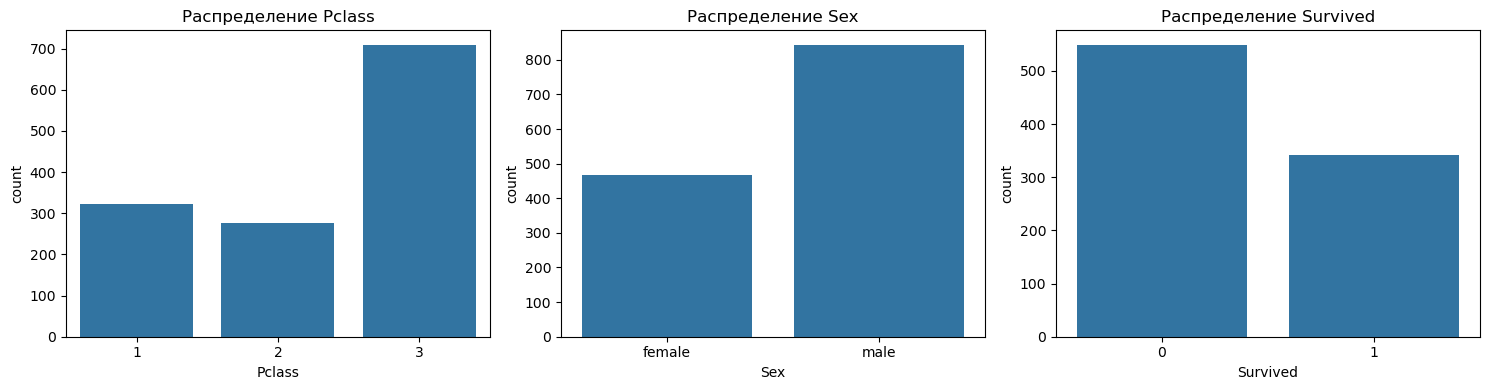

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Описательная статистика
desc = df.describe(include='all')

# 2. Гистограммы (countplot) для категорий
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.countplot(data=df, x='Pclass',   ax=axes[0]).set_title('Распределение Pclass')
sns.countplot(data=df, x='Sex',      ax=axes[1]).set_title('Распределение Sex')
sns.countplot(data=df, x='Survived', ax=axes[2]).set_title('Распределение Survived')
plt.tight_layout()
plt.show()
